In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
import os


import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sys
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import euclidean_distances, cosine_similarity
from sklearn.utils import shuffle
from sklearn.utils import class_weight
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, BatchNormalization,SpatialDropout1D,Bidirectional, Embedding, LSTM
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence
import re

np.set_printoptions(threshold=sys.maxsize)

pd.set_option('display.max_rows',1000)
pd.set_option('display.max_columns',1000)






In [7]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.10.0


In [8]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [9]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import json
import re
import os


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [7]:
# Step 1: Load the dataset
df = pd.read_csv('dnm_data.csv')

# Step 2: Inspect the data
print(df.head())
print(df.info())


   right ankle  left ankle  right knee   left knee   right hip    left hip  \
0    12.944026    6.000800   95.942831   99.854393  113.441687  131.700036   
1    12.443676    0.781863   95.782953  101.014812  114.488851  130.505853   
2    11.637988   -0.908656   95.323614  100.349987  114.571658  129.621774   
3    10.841199   -0.329296   94.148861   98.000590  113.431576  128.903630   
4    10.413660   -0.441691   92.743903   96.162573  112.335880  128.525763   

   right shoulder  left shoulder  right elbow  left elbow  right foot  \
0       86.836579      83.225082     8.548693   13.507208  -59.036241   
1       87.120283      84.077935     9.159329   10.111409  -58.531338   
2       87.306814      84.644709     9.344013    9.018444  -58.972446   
3       87.275561      85.057686     8.804522    9.391575  -59.715785   
4       87.274781      85.535041     8.185580    8.998181  -59.850859   

   left foot  right shank  left shank  right thigh  left thigh     pelvis  \
0 -51.632681  -

In [9]:
# Step 4: Normalize all columns (except athlete_id)
# Extract numeric columns excluding 'athlete_id'
numeric_cols = df.columns.difference(['athlete_id'])

# Use MinMaxScaler to normalize all positional columns between 0 and 1
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


In [10]:
# Step 5: Define the scoring function using all numeric columns
def calculate_row_score(row):
    """
    Calculate a score for a row based on all positional values.
    """
    # Calculate the average of all normalized values (excluding athlete_id)
    score = row[numeric_cols].mean()
    return score

# Apply the scoring function to calculate row scores
df['row_score'] = df.apply(calculate_row_score, axis=1)

In [13]:
df.row_score.describe()

count    9967.000000
mean        0.408253
std         0.048574
min         0.310053
25%         0.375795
50%         0.401576
75%         0.430527
max         0.615844
Name: row_score, dtype: float64

In [14]:
# Step 6: Scale row scores to a range of 0 to 5 for final scoring
scaler_row_scores = MinMaxScaler(feature_range=(0, 5))
df['row_score_normalized'] = scaler_row_scores.fit_transform(df[['row_score']])

In [15]:
# Step 7: Group by athlete_id and calculate the overall score per athlete
athlete_scores = df.groupby('athlete_id')['row_score_normalized'].mean().reset_index()
athlete_scores.rename(columns={'row_score_normalized': 'overall_score'}, inplace=True)

In [16]:
# Step 8: Output the results
print("Overall Scores for Each Athlete:")
print(athlete_scores)


Overall Scores for Each Athlete:
                       athlete_id  overall_score
0     1046239441-preview_person00       1.542449
1     3651805267-preview_person00       1.295582
2   SprintStartEvaluate1_person00       1.299573
3                  block_person00       1.326242
4                  block_person01       1.780781
5                  block_person02       1.420349
6                   man1_person00       2.747657
7                   man1_person01       1.155326
8                   man1_person04       1.969553
9                 women1_person00       2.691000
10                women1_person01       1.757825
11                women2_person01       1.269015
12                women2_person02       0.871677
13                women3_person01       1.289331
14                women3_person02       0.892554


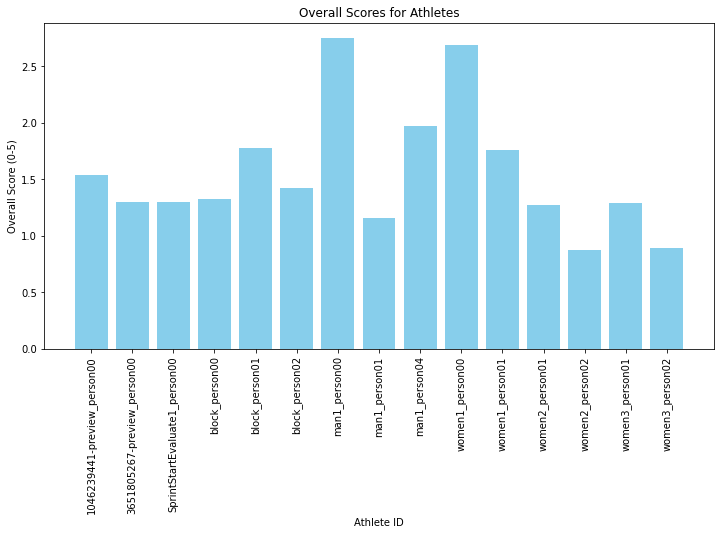

In [17]:
# Step 9: Visualization (Optional)
import matplotlib.pyplot as plt

# Bar plot of overall scores for athletes
plt.figure(figsize=(12, 6))
plt.bar(athlete_scores['athlete_id'], athlete_scores['overall_score'], color='skyblue')
plt.xlabel('Athlete ID')
plt.ylabel('Overall Score (0-5)')
plt.title('Overall Scores for Athletes')
plt.xticks(rotation=90)
plt.show()

Overall Scores for Each Athlete:
                       athlete_id  overall_score
0     1046239441-preview_person00       2.313926
1     3651805267-preview_person00       2.092686
2   SprintStartEvaluate1_person00       2.436663
3                  block_person00       2.796673
4                  block_person01       2.336142
5                  block_person02       2.255528
6                   man1_person00       1.716593
7                   man1_person01       2.106454
8                   man1_person04       2.035913
9                 women1_person00       2.472450
10                women1_person01       3.186470
11                women2_person01       2.323362
12                women2_person02       3.009652
13                women3_person01       3.305150
14                women3_person02       1.470671


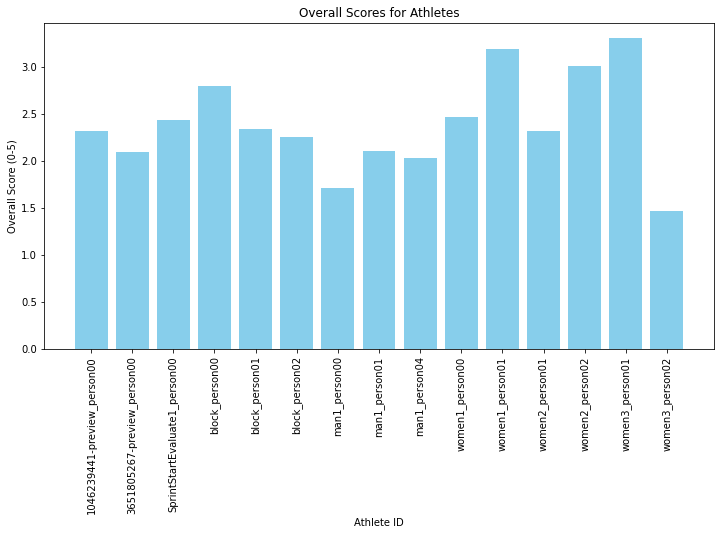

In [49]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Step 1: Load the dataset
df = pd.read_csv('dnm_data.csv')



# Step 3: Normalize values per athlete
# Group by athlete_id
numeric_cols = df.columns.difference(['athlete_id'])
df[numeric_cols] = df.groupby('athlete_id')[numeric_cols].transform(
    lambda x: (x - x.min()) / (x.max() - x.min())
)

# Step 4: Weighted scoring function
def calculate_weighted_score(row, weights):
    """
    Calculate a weighted score based on positional values.
    :param row: DataFrame row
    :param weights: Dictionary of column weights
    """
    weighted_sum = sum(row[col] * weights.get(col, 1) for col in numeric_cols)
    return weighted_sum / sum(weights.values())

# Define weights for each column (adjust as needed)
weights = {
    'trunk': 1.5,
    'shoulders': 1.2,
    'head': 1.0,
    'right arm': 1.0,
    'left arm': 1.0,
    'right forearm': 1.3,
    'left forearm': 1.3,
}

# Apply the weighted scoring function
df['row_score'] = df.apply(calculate_weighted_score, axis=1, weights=weights)

# Step 5: Scale row scores to a range of 0 to 5
scaler = MinMaxScaler(feature_range=(0, 5))
df['row_score_scaled'] = scaler.fit_transform(df[['row_score']])

# Step 6: Group by athlete_id and calculate overall score
athlete_scores = df.groupby('athlete_id')['row_score_scaled'].mean().reset_index()
athlete_scores.rename(columns={'row_score_scaled': 'overall_score'}, inplace=True)

# Step 7: Output the results
print("Overall Scores for Each Athlete:")
print(athlete_scores)

# Step 8: Visualization (Optional)
import matplotlib.pyplot as plt

# Bar plot of overall scores
plt.figure(figsize=(12, 6))
plt.bar(athlete_scores['athlete_id'], athlete_scores['overall_score'], color='skyblue')
plt.xlabel('Athlete ID')
plt.ylabel('Overall Score (0-5)')
plt.title('Overall Scores for Athletes')
plt.xticks(rotation=90)
plt.show()


In [25]:
# Step 1: Define features (X) and target (y)
X = df[numeric_cols]  # All positional columns
y = df['row_score_scaled']  # Target variable: normalized row score


In [26]:
# Step 2: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
# Step 3: Initialize and train the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [28]:
# Step 4: Evaluate the model
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"R² Score: {r2:.3f}")

Mean Absolute Error (MAE): 0.032
R² Score: 0.994


In [31]:
import joblib
# Step 5: Save the trained model
joblib.dump(model, 'athlete_scoring_model_new.pkl')
print("Model saved as 'athlete_scoring_model.pkl'.")

Model saved as 'athlete_scoring_model.pkl'.


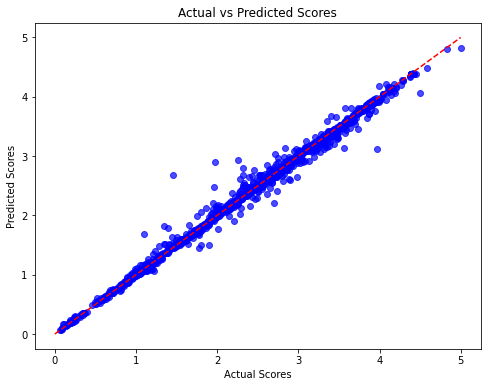

In [29]:
# Step 7: Visualize predictions vs actual scores (Optional)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([0, 5], [0, 5], '--r')  # Ideal line
plt.xlabel("Actual Scores")
plt.ylabel("Predicted Scores")
plt.title("Actual vs Predicted Scores")
plt.show()

In [47]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import joblib

# Step 1: Load the test dataset
test_df = pd.read_csv('women1_Sports2D_angles_person01.xls', skiprows=10, sep='\t')  # Replace with the actual test file name
test_df = test_df .drop(columns=['time'])
# Step 2: Normalize all columns in the test dataset
# Apply Min-Max Scaling globally
test_df = test_df.transform(lambda x: (x - x.min()) / (x.max() - x.min()))

# Step 3: Load the trained model (athlete_scoring_model_new.pkl)
model = joblib.load('athlete_scoring_model_new.pkl')
print("Model loaded successfully.")

# Step 4: Make predictions for the test set
predictions = model.predict(test_df)

# Step 5: Calculate the overall score (mean of all rows in the test set)
overall_score = predictions.mean()

# Step 6: Display the overall score
print(f"Overall Exam Score: {overall_score:.2f} / 5.0")


Model loaded successfully.
Overall Exam Score: 2.72 / 5.0


C:\Users\izzet\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [50]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import joblib

# Step 1: Load the test dataset
test_df = pd.read_csv('man2_Sports2D_angles_person01.xls', skiprows=10, sep='\t')  # Replace with the actual test file name
test_df = test_df .drop(columns=['time'])
# Step 2: Normalize all columns in the test dataset
# Apply Min-Max Scaling globally
test_df = test_df.transform(lambda x: (x - x.min()) / (x.max() - x.min()))

# Step 3: Load the trained model (athlete_scoring_model_new.pkl)
model = joblib.load('athlete_scoring_model_new.pkl')
print("Model loaded successfully.")

# Step 4: Make predictions for the test set
predictions = model.predict(test_df)

# Step 5: Calculate the overall score (mean of all rows in the test set)
overall_score = predictions.mean()

# Step 6: Display the overall score
print(f"Overall Exam Score: {overall_score:.2f} / 5.0")


Model loaded successfully.
Overall Exam Score: 2.58 / 5.0


C:\Users\izzet\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
